In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:\\Users\\KBINM16696\\Desktop\\Data Science & Python\\Analytics Vidhya Hackathon Practice\\Novartis Hackerearth\\Dataset\\'

In [3]:
train = pd.read_csv(path + 'Train.csv')
test = pd.read_csv(path + 'Test.csv')
#samp = pd.read_csv(path + 'sample_submission.csv')

In [4]:
print(train.shape)
print(test.shape)

(23856, 18)
(15903, 17)


In [5]:
# train.info()

In [6]:
# test.info()

In [7]:
train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [8]:
train.MULTIPLE_OFFENSE.value_counts(normalize=True)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

In [9]:
train['DATE'] = pd.to_datetime(train['DATE'])
test['DATE'] = pd.to_datetime(test['DATE'])

In [10]:
print('training data is present from {} to {}'.format(train.DATE.dt.date.min(),train.DATE.dt.date.max()))
print('test data is present from {} to {}'.format(test.DATE.dt.date.min(),test.DATE.dt.date.max()))

training data is present from 1991-01-01 to 2018-12-31
test data is present from 1991-01-02 to 2018-12-28


#### check baseline model accuracy and score on hackerearth platform

In [11]:
X = train.iloc[:, 2:-1].fillna(-9999)
y = train.iloc[:,-1]
X_test = test.iloc[:,2:].fillna(-9999)


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score
from sklearn.metrics import confusion_matrix

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

st = StandardScaler()
X = st.fit_transform(X)
X_test = st.transform(X_test)

### Random Forest Baseline

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=50)
rf.fit(X,y)
pred = rf.predict(X_test)
# #samp['INCIDENT_ID'] = test.INCIDENT_ID
# #samp['MULTIPLE_OFFENSE'] = pred

In [15]:
# solutions = pd.DataFrame({'INCIDENT_ID':test.INCIDENT_ID,
#                          'MULTIPLE_OFFENSE':pred})

In [16]:
#solutions.to_csv(path + 'baseline_soln1.csv', index=False)

# catboost baseline

In [17]:
import catboost

In [18]:
# from catboost import CatBoostClassifier
# cb = CatBoostClassifier()

In [19]:
# cb.fit(X,y)
# pred1 = cb.predict(X_test)

In [20]:
# submission1 = pd.DataFrame()
# submission1['INCIDENT_ID'] = test.INCIDENT_ID
# submission1['MULTIPLE_OFFENSE'] = pred1
# submission1.to_csv(path + 'catboost_baseline_sub2.csv', index=False)

### Xgboost baseline

In [21]:
from xgboost import XGBClassifier

In [22]:
# xgb = XGBClassifier()
# xgb.fit(X, y)
# pred2 = xgb.predict(X_test)

In [23]:
# sub2 = pd.DataFrame()
# sub2['INCIDENT_ID'] = test.INCIDENT_ID
# sub2['MULTIPLE_OFFENSE'] = pred2
# sub2.to_csv(path + 'xgboost_baseline_sub2.csv', index=False)

### Logistic Regression baseline

In [24]:
# from sklearn.linear_model import LogisticRegression

In [25]:
# lr = LogisticRegression()
# lr.fit(X,y)
# pred3 = lr.predict(X_test)

In [26]:
# sub3 = pd.DataFrame()
# sub3['INCIDENT_ID'] = test.INCIDENT_ID
# sub3['MULTIPLE_OFFENSE'] = pred3
# sub3.to_csv(path + 'logisticReg_baseline_sub3.csv', index=False)

-- catboost is performing best in the baseline models
we need to perform feature engineering on DATE columns to maximize 

In [27]:
# get feature importance

In [28]:
df_feature_imp = pd.DataFrame()
df_feature_imp['var'] = train.columns[2:-1]
df_feature_imp['feature_importance']=rf.feature_importances_
#df_feature_imp.reset_index(drop=True, inplace=True)
df_feature_imp=df_feature_imp.sort_values(['feature_importance'], ascending=False).reset_index(drop=True)
df_feature_imp

,var,feature_importance
0,X_10,0.264803
1,X_11,0.241198
2,X_12,0.150433
3,X_15,0.120047
4,X_13,0.030630
5,X_14,0.028320
6,X_3,0.026599
7,X_2,0.025842
8,X_6,0.023416
9,X_7,0.022400


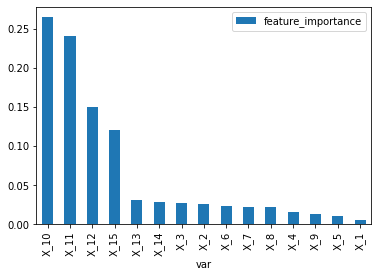

In [29]:
df_feature_imp.plot(kind='bar', x = 'var', y='feature_importance')

### creating time based features

In [30]:
data_all = pd.concat([train, test])
data_all.shape

(39759, 18)

In [31]:
data_all.reset_index(inplace=True, drop=True)

In [32]:
def create_date_features(df):
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    df['day'] = df['DATE'].dt.day
    df['DayOfWeek'] = df['DATE'].dt.dayofweek
    df['DayOfYear'] = df['DATE'].dt.dayofyear
    df['week'] = df['DATE'].dt.week
    df['Quarter'] = df['DATE'].dt.quarter
    df['is_month_start'] = df['DATE'].dt.is_month_start
    df['is_month_start'] = df['DATE'].dt.is_month_end
    df['is_quarter_start'] = df['DATE'].dt.is_quarter_start
    df['is_quarter_end'] = df['DATE'].dt.is_quarter_end
    df['is_year_start'] = df['DATE'].dt.is_year_start
    df['is_year_end'] = df['DATE'].dt.is_year_end
    df['Semester'] = np.where(df['Quarter'].isin([1,2]),1,2)
    df['is_weekend'] = np.where(df['DayOfWeek'].isin([5,6]), 1,0)
    df['is_weekday'] = np.where(df['DayOfWeek'].isin([0,1,2,3,4]), 1,0)
    return df

In [33]:
data_all = create_date_features(data_all)
data_all.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,week,Quarter,is_month_start,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester,is_weekend,is_weekday
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,...,27,3,False,False,False,False,False,2,1,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,...,29,3,False,False,False,False,False,2,0,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,...,11,1,False,False,False,False,False,1,0,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,...,7,1,False,False,False,False,False,1,0,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,...,15,2,False,False,False,False,False,1,0,1


In [34]:
train.nunique()

INCIDENT_ID         23856
DATE                 9121
X_1                     8
X_2                    52
X_3                    52
X_4                    10
X_5                     5
X_6                    19
X_7                    19
X_8                    24
X_9                     7
X_10                   24
X_11                  133
X_12                   23
X_13                   60
X_14                   62
X_15                   28
MULTIPLE_OFFENSE        2
dtype: int64

In [35]:
test.nunique()

INCIDENT_ID    15903
DATE            7939
X_1                8
X_2               52
X_3               52
X_4               10
X_5                5
X_6               19
X_7               19
X_8               22
X_9                7
X_10              18
X_11             106
X_12              17
X_13              54
X_14              51
X_15              29
dtype: int64

In [36]:
test.X_15.value_counts()

34    12699
43     1001
0       663
23      421
46      411
48      343
36      125
9        78
50       72
39       28
38       17
24       10
18        7
41        6
40        4
5         3
35        3
17        1
16        1
1         1
47        1
25        1
33        1
2         1
3         1
11        1
14        1
15        1
42        1
Name: X_15, dtype: int64

In [37]:
train.X_15.value_counts()

34    18947
43     1503
0      1017
46      668
23      642
48      521
36      182
50      145
9        92
39       54
24       20
38       20
18       13
40        6
41        6
17        4
4         4
15        2
32        1
16        1
31        1
35        1
5         1
21        1
8         1
12        1
14        1
22        1
Name: X_15, dtype: int64

In [38]:
(test.X_15.value_counts(normalize=True)*100).head().sum()

95.54800980946992

In [39]:
(train.X_15.value_counts(normalize=True)*100).head().sum()

95.47702883970489

In [40]:
# pd.Series(test.X_15.unique()).isin(pd.Series(train.X_15.unique()))

In [41]:
pd.pivot_table(train, index='X_15', values=['INCIDENT_ID'],columns=['MULTIPLE_OFFENSE'], aggfunc='count', margins=True)

INCIDENT_ID                
MULTIPLE_OFFENSE           0        1    All
X_15                                        
0                       20.0    997.0   1017
4                        4.0      NaN      4
5                        1.0      NaN      1
8                        1.0      NaN      1
9                       92.0      NaN     92
12                       1.0      NaN      1
14                       1.0      NaN      1
15                       2.0      NaN      2
16                       1.0      NaN      1
17                       4.0      NaN      4
18                       NaN     13.0     13
21                       1.0      NaN      1
22                       1.0      NaN      1
23                       2.0    640.0    642
24                      20.0      NaN     20
31                       1.0      NaN      1
32                       1.0      NaN      1
34                     620.0  18327.0  18947
35                       1.0      NaN      1
36                     182.0      NaN    182
38                      20.0      NaN     20
39                      54.0      NaN     54
40                       6.0      NaN      6
41                       NaN      6.0      6
43                       2.0   1501.0   1503
46                      23.0    645.0    668
48                       7.0    514.0    521
50                       NaN    145.0    145
All                   1068.0  22788.0  23856

### missing value treatment

In [42]:
data_all['X_12'].fillna(data_all.X_12.value_counts().idxmax(), inplace=True)

In [43]:
## missing value filled with mode value

In [44]:
# ### transform X_12 columns and group the 4+ values in the same category
# ### transform X_10 columns and group the 4+ values in the same category
# data_all['X_12'] = np.where(data_all['X_12']>4, '4+', data_all['X_12'])
# data_all['X_10'] = np.where(data_all['X_10']>4, '4+', data_all['X_10'])

In [45]:
train1 = data_all.loc[~(data_all.MULTIPLE_OFFENSE.isnull())]
test1 = data_all.loc[(data_all.MULTIPLE_OFFENSE.isnull())]
print(train1.shape)
print(test1.shape)

(23856, 33)
(15903, 33)


In [46]:
test1.reset_index(inplace=True, drop=True)
test1.drop('MULTIPLE_OFFENSE', axis=1, inplace=True)
test1.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,week,Quarter,is_month_start,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester,is_weekend,is_weekday
0,CR_195453,2018-02-01,0,30,35,7,3,6,4,0,...,5,1,False,False,False,False,False,1,0,1
1,CR_103520,2004-03-05,0,44,44,1,3,7,1,4,...,10,1,False,False,False,False,False,1,0,1
2,CR_196089,2018-01-27,0,34,33,3,5,2,7,3,...,4,1,False,False,False,False,False,1,1,0
3,CR_112195,2006-08-18,7,3,2,3,5,9,8,0,...,33,3,False,False,False,False,False,2,0,1
4,CR_149832,2011-10-31,0,7,8,7,3,2,7,1,...,44,4,True,False,False,False,False,2,0,1


#### catboost without converting categorical columns

In [47]:
cols_not_taken = ['INCIDENT_ID', 'DATE', 'MULTIPLE_OFFENSE']

In [48]:
X1 = train1[train1.columns.difference(cols_not_taken)]
y1 = train['MULTIPLE_OFFENSE']
X_test1 = test1[test1.columns.difference(cols_not_taken)]
print(X1.shape)
print(y1.shape)
print(X_test1.shape)

(23856, 30)
(23856,)
(15903, 30)


In [49]:
# X1 = pd.get_dummies(X1)
# X_test1 = pd.get_dummies(X_test1)

In [50]:
le = LabelEncoder()
y1 = le.fit_transform(y1)

In [51]:
# st = StandardScaler()
# X1 = st.fit_transform(X1)
# X_test1 = st.transform(X_test1)

In [52]:
# cb1 = CatBoostClassifier()
# cb1.fit(X1, y1)
# pred4 = cb1.predict(X_test1)

In [53]:
# sub4 = pd.DataFrame()
# sub4['INCIDENT_ID'] = test.INCIDENT_ID
# sub4['MULTIPLE_OFFENSE'] = pred4
# sub4.to_csv(path + 'catboost_sub4.csv', index=False)

In [54]:
# check1 = pd.DataFrame({'Name':['amar', 'akbar', 'anthony', 'abhi', 'anna'],
#                       'city':['BR', 'UP', 'MP','UP', 'BR'],
#                       'marks':[100, 200, 300, 400, 500],
#                       'tier':[1,2,3,1,2]})

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
ohe = OneHotEncoder(drop='first')

In [57]:
cols_to_ohe = X1.select_dtypes(include=['object', 'bool']).columns.tolist()

In [58]:
ohe_vars = pd.DataFrame(ohe.fit_transform(X1[cols_to_ohe]).toarray())
ohe_vars.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [59]:
ohe_vars1 = pd.DataFrame(ohe.transform(X_test1[cols_to_ohe]).toarray())
ohe_vars1.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [60]:
# drop the columns which are one hot encoded
X1.drop(cols_to_ohe, axis=1, inplace=True)
X_test1.drop(cols_to_ohe, axis=1, inplace=True)
print(X1.shape)
print(X_test1.shape)

(23856, 25)
(15903, 25)


In [61]:
## apply standard scalar on the variables not encoded
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X1 = pd.DataFrame(st.fit_transform(X1), columns=X1.columns.tolist())
X_test1 = pd.DataFrame(st.transform(X_test1), columns=X_test1.columns.tolist())

In [62]:
## concat ohe variables with the remaining independent variables

X1 = pd.concat([X1, ohe_vars], axis=1)
X_test1 = pd.concat([X_test1, ohe_vars1], axis=1)
print(X1.shape)
print(X_test1.shape)

(23856, 30)
(15903, 30)


In [63]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X1, y1)
pred = cb.predict(X_test1)

Learning rate set to 0.039918
0:	learn: 0.6019113	total: 152ms	remaining: 2m 31s
1:	learn: 0.5247301	total: 189ms	remaining: 1m 34s
2:	learn: 0.4508847	total: 232ms	remaining: 1m 16s
3:	learn: 0.4201207	total: 284ms	remaining: 1m 10s
4:	learn: 0.3633851	total: 322ms	remaining: 1m 4s
5:	learn: 0.3321572	total: 359ms	remaining: 59.5s
6:	learn: 0.2938906	total: 397ms	remaining: 56.3s
7:	learn: 0.2627981	total: 431ms	remaining: 53.4s
8:	learn: 0.2440241	total: 455ms	remaining: 50.1s
9:	learn: 0.2255470	total: 478ms	remaining: 47.3s
10:	learn: 0.1996712	total: 501ms	remaining: 45.1s
11:	learn: 0.1888713	total: 524ms	remaining: 43.1s
12:	learn: 0.1801527	total: 547ms	remaining: 41.5s
13:	learn: 0.1579540	total: 570ms	remaining: 40.2s
14:	learn: 0.1427619	total: 596ms	remaining: 39.2s
15:	learn: 0.1316697	total: 622ms	remaining: 38.2s
16:	learn: 0.1141304	total: 646ms	remaining: 37.3s
17:	learn: 0.1027856	total: 668ms	remaining: 36.5s
18:	learn: 0.0929792	total: 692ms	remaining: 35.7s
19:	lea

162:	learn: 0.0062098	total: 4.47s	remaining: 23s
163:	learn: 0.0062031	total: 4.5s	remaining: 22.9s
164:	learn: 0.0061700	total: 4.54s	remaining: 23s
165:	learn: 0.0061520	total: 4.57s	remaining: 23s
166:	learn: 0.0060856	total: 4.6s	remaining: 22.9s
167:	learn: 0.0060761	total: 4.63s	remaining: 22.9s
168:	learn: 0.0060186	total: 4.66s	remaining: 22.9s
169:	learn: 0.0060108	total: 4.69s	remaining: 22.9s
170:	learn: 0.0059435	total: 4.72s	remaining: 22.9s
171:	learn: 0.0059126	total: 4.75s	remaining: 22.9s
172:	learn: 0.0058706	total: 4.78s	remaining: 22.8s
173:	learn: 0.0058590	total: 4.8s	remaining: 22.8s
174:	learn: 0.0058219	total: 4.83s	remaining: 22.7s
175:	learn: 0.0058181	total: 4.84s	remaining: 22.7s
176:	learn: 0.0058071	total: 4.87s	remaining: 22.7s
177:	learn: 0.0057700	total: 4.89s	remaining: 22.6s
178:	learn: 0.0057124	total: 4.92s	remaining: 22.6s
179:	learn: 0.0056601	total: 4.94s	remaining: 22.5s
180:	learn: 0.0056601	total: 4.96s	remaining: 22.4s
181:	learn: 0.0056317

328:	learn: 0.0034544	total: 8.01s	remaining: 16.3s
329:	learn: 0.0034544	total: 8.03s	remaining: 16.3s
330:	learn: 0.0034544	total: 8.04s	remaining: 16.3s
331:	learn: 0.0034544	total: 8.06s	remaining: 16.2s
332:	learn: 0.0034544	total: 8.07s	remaining: 16.2s
333:	learn: 0.0034544	total: 8.09s	remaining: 16.1s
334:	learn: 0.0034544	total: 8.11s	remaining: 16.1s
335:	learn: 0.0034544	total: 8.12s	remaining: 16s
336:	learn: 0.0034544	total: 8.13s	remaining: 16s
337:	learn: 0.0034544	total: 8.15s	remaining: 16s
338:	learn: 0.0034544	total: 8.16s	remaining: 15.9s
339:	learn: 0.0034544	total: 8.18s	remaining: 15.9s
340:	learn: 0.0034544	total: 8.19s	remaining: 15.8s
341:	learn: 0.0034543	total: 8.22s	remaining: 15.8s
342:	learn: 0.0034543	total: 8.24s	remaining: 15.8s
343:	learn: 0.0034543	total: 8.26s	remaining: 15.8s
344:	learn: 0.0034543	total: 8.28s	remaining: 15.7s
345:	learn: 0.0034543	total: 8.29s	remaining: 15.7s
346:	learn: 0.0034543	total: 8.31s	remaining: 15.6s
347:	learn: 0.0034

498:	learn: 0.0034536	total: 10.7s	remaining: 10.8s
499:	learn: 0.0034536	total: 10.8s	remaining: 10.8s
500:	learn: 0.0034536	total: 10.8s	remaining: 10.7s
501:	learn: 0.0034536	total: 10.8s	remaining: 10.7s
502:	learn: 0.0034536	total: 10.8s	remaining: 10.7s
503:	learn: 0.0034536	total: 10.8s	remaining: 10.6s
504:	learn: 0.0034536	total: 10.8s	remaining: 10.6s
505:	learn: 0.0034536	total: 10.8s	remaining: 10.6s
506:	learn: 0.0034536	total: 10.8s	remaining: 10.5s
507:	learn: 0.0034536	total: 10.9s	remaining: 10.5s
508:	learn: 0.0034536	total: 10.9s	remaining: 10.5s
509:	learn: 0.0034536	total: 10.9s	remaining: 10.5s
510:	learn: 0.0034536	total: 10.9s	remaining: 10.4s
511:	learn: 0.0034536	total: 10.9s	remaining: 10.4s
512:	learn: 0.0034536	total: 10.9s	remaining: 10.4s
513:	learn: 0.0034536	total: 11s	remaining: 10.4s
514:	learn: 0.0034536	total: 11s	remaining: 10.3s
515:	learn: 0.0034536	total: 11s	remaining: 10.3s
516:	learn: 0.0034536	total: 11s	remaining: 10.3s
517:	learn: 0.003453

659:	learn: 0.0034536	total: 13.4s	remaining: 6.92s
660:	learn: 0.0034536	total: 13.5s	remaining: 6.9s
661:	learn: 0.0034536	total: 13.5s	remaining: 6.88s
662:	learn: 0.0034536	total: 13.5s	remaining: 6.86s
663:	learn: 0.0034536	total: 13.5s	remaining: 6.83s
664:	learn: 0.0034536	total: 13.5s	remaining: 6.81s
665:	learn: 0.0034536	total: 13.5s	remaining: 6.79s
666:	learn: 0.0034536	total: 13.5s	remaining: 6.76s
667:	learn: 0.0034536	total: 13.6s	remaining: 6.74s
668:	learn: 0.0034536	total: 13.6s	remaining: 6.72s
669:	learn: 0.0034536	total: 13.6s	remaining: 6.69s
670:	learn: 0.0034536	total: 13.6s	remaining: 6.67s
671:	learn: 0.0034536	total: 13.6s	remaining: 6.64s
672:	learn: 0.0034536	total: 13.6s	remaining: 6.62s
673:	learn: 0.0034536	total: 13.6s	remaining: 6.6s
674:	learn: 0.0034536	total: 13.7s	remaining: 6.58s
675:	learn: 0.0034536	total: 13.7s	remaining: 6.55s
676:	learn: 0.0034536	total: 13.7s	remaining: 6.53s
677:	learn: 0.0034536	total: 13.7s	remaining: 6.51s
678:	learn: 0.

825:	learn: 0.0034536	total: 15.8s	remaining: 3.33s
826:	learn: 0.0034536	total: 15.8s	remaining: 3.31s
827:	learn: 0.0034536	total: 15.8s	remaining: 3.29s
828:	learn: 0.0034536	total: 15.8s	remaining: 3.27s
829:	learn: 0.0034536	total: 15.9s	remaining: 3.25s
830:	learn: 0.0034536	total: 15.9s	remaining: 3.23s
831:	learn: 0.0034536	total: 15.9s	remaining: 3.21s
832:	learn: 0.0034536	total: 15.9s	remaining: 3.19s
833:	learn: 0.0034536	total: 15.9s	remaining: 3.17s
834:	learn: 0.0034536	total: 15.9s	remaining: 3.15s
835:	learn: 0.0034536	total: 16s	remaining: 3.13s
836:	learn: 0.0034536	total: 16s	remaining: 3.11s
837:	learn: 0.0034536	total: 16s	remaining: 3.09s
838:	learn: 0.0034536	total: 16s	remaining: 3.07s
839:	learn: 0.0034536	total: 16s	remaining: 3.05s
840:	learn: 0.0034536	total: 16s	remaining: 3.03s
841:	learn: 0.0034536	total: 16.1s	remaining: 3.01s
842:	learn: 0.0034536	total: 16.1s	remaining: 2.99s
843:	learn: 0.0034536	total: 16.1s	remaining: 2.97s
844:	learn: 0.0034536	to

990:	learn: 0.0034536	total: 18.4s	remaining: 168ms
991:	learn: 0.0034536	total: 18.5s	remaining: 149ms
992:	learn: 0.0034536	total: 18.5s	remaining: 130ms
993:	learn: 0.0034536	total: 18.5s	remaining: 112ms
994:	learn: 0.0034536	total: 18.5s	remaining: 93ms
995:	learn: 0.0034536	total: 18.5s	remaining: 74.4ms
996:	learn: 0.0034536	total: 18.5s	remaining: 55.8ms
997:	learn: 0.0034536	total: 18.5s	remaining: 37.2ms
998:	learn: 0.0034536	total: 18.6s	remaining: 18.6ms
999:	learn: 0.0034536	total: 18.6s	remaining: 0us


In [64]:
len(pred)

15903

In [65]:
sub4 = pd.DataFrame()
sub4['INCIDENT_ID'] = test.INCIDENT_ID
sub4['MULTIPLE_OFFENSE'] = pred
sub4.to_csv(path + 'catboost_with_ohe_encoded_time_vars.csv', index=False)

### xgboost

In [66]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=50)

In [67]:
xgb.fit(X1, y1)
pred = xgb.predict(X_test1)

In [68]:
sub4 = pd.DataFrame()
sub4['INCIDENT_ID'] = test.INCIDENT_ID
sub4['MULTIPLE_OFFENSE'] = pred
sub4.to_csv(path + 'xgb_with_ohe_encoded_time_variables.csv', index=False)